In [15]:
import numpy as np

In [16]:
def initialize_parameters(layer_dims):
    '''
    E.g. layer_dims = [5, 10, 25, 15, 1]; 5 features
    '''

    parameters = {}
    for l in range(1, len(layer_dims)):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2/layer_dims[l-1])
        parameters['b'+str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

In [17]:
def sigmoid(x):
    x = np.clip(x, -500, 500) 
    sigmoid = 1/(1+np.exp(-x))
    return sigmoid

In [18]:
def forward_prop(A_in, W, b, activation, l):

    Z = np.dot(W, A_in) + b
    if activation=='relu':
        A_out = np.maximum(0, Z)
    elif activation=='tanh':
        A_out = np.tanh(Z)
    elif activation=='sigmoid':
        A_out = sigmoid(Z)

    cache = {'A'+str(l-1):A_in, 'W'+str(l):W, 'b'+str(l):b, 'Z'+str(l): Z, 'activation_'+str(l):activation}

    return A_out, cache

In [19]:
def binary_cross_entropy_cost(Yhat, Y):
    epsilon = 1e-15
    m = Y.shape[1]  # Correct dimension
    Yhat = np.clip(Yhat, epsilon, 1 - epsilon)
    cost = -1/m * np.sum((Y * np.log(Yhat)) + ((1-Y) * np.log(1-Yhat)))
    return cost

In [20]:
def back_prop(dA_out, cache, activation, l):
    
    Z, W, A_in, m = cache['Z'+str(l)], cache['W'+str(l)], cache['A'+str(l-1)], cache['A'+str(l-1)].shape[1]

    if activation=='relu':
        dZ = dA_out * (Z > 0)
    elif activation=='tanh':
        dZ = dA_out * (1-np.square(np.tanh(Z)))
    elif activation=='sigmoid':
        dZ = dA_out * sigmoid(Z) * (1-sigmoid(Z))

    dW = 1/m * np.dot(dZ, A_in.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_in = np.dot(W.T, dZ)

    return dA_in, dW, db


In [21]:
def gradient_descent(parameters, grads, learning_rate=0.01):

    L = len(parameters)//2
    for l in range(1, L+1):
        parameters['W'+str(l)] -= learning_rate * grads['dW'+str(l)]
        parameters['b'+str(l)] -= learning_rate * grads['db'+str(l)]
    
    return parameters

In [22]:
def propagate(X, Y, parameters, layer_dims, activations):
    '''
    E.g. activations = ['relu', 'relu', 'relu', 'sigmoid']
    '''

    # Forward prop
    L = len(layer_dims)
    A_in = X
    caches = []
    for l in range(1, L):
        A_out, cache = forward_prop(A_in, parameters['W'+str(l)], parameters['b'+str(l)], activations[l-1], l)
        A_in = A_out
        caches.append(cache)
    
    # Compute cost unnecessarily
    cost = binary_cross_entropy_cost(A_in, Y)

    # Back prop of all layers
    grads = {}
    epsilon = 1e-15
    A_out_clipped = np.clip(A_in, epsilon, 1 - epsilon)
    dA_out = -((Y/A_out_clipped)-((1-Y)/(1-A_out_clipped)))
    for l in range(L-1, 0, -1):
        cache = caches[l-1]
        dA_in, grads['dW'+str(l)], grads['db'+str(l)] = back_prop(dA_out, cache, activations[l-1], l)
        dA_out = dA_in

    return grads, cost

In [23]:
def make_mini_batches(X, Y, batch_size=64, seed=42):
    
    # Set seed for reproducability 
    np.random.seed(seed)
    m = X.shape[1]
    permutation = np.random.permutation(m)
    # shuffle X
    X_shuffled = X[:, permutation]
    Y_shuffled = Y[:, permutation]

    # Make mini-batches
    mini_batches= []
    for i in range(0, m, batch_size):
        X_batch = X_shuffled[:, i:i+batch_size]
        Y_batch = Y_shuffled[:, i:i+batch_size]
        mini_batches.append((X_batch, Y_batch))
        
    return mini_batches

In [24]:
def train(X, Y, layer_dims, activations, iters=1000):

    # Initialize parameters
    parameters = initialize_parameters(layer_dims)
    # Forward and back prop
    cost_history = []

    # Gradient descent
    for iter in range(iters):
        
        mini_batches = make_mini_batches(X, Y)
        epoch_cost = 0
        
        for X_batch, Y_batch in mini_batches: 
            grads, cost = propagate(X_batch, Y_batch, parameters, layer_dims, activations)
            parameters = gradient_descent(parameters, grads) 
            epoch_cost += cost

        cost_history.append(epoch_cost/len(mini_batches))

    return parameters, cost_history

In [25]:
def predict(X, Y, parameters, activations):
    
    # Forward prop
    L = len(parameters)//2
    A_in = X
    for l in range(1, L+1):
        A_out, cache = forward_prop(A_in, parameters['W'+str(l)], parameters['b'+str(l)], activations[l-1], l)
        A_in = A_out

    # Predicted class and probability
    Y_pred = (A_out > 0.5).astype(int)
    Y_prob = A_out
    return Y_pred, Y_prob


In [26]:
# # Model implementation

# from sklearn.datasets import make_blobs
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load dataset
# X, Y = make_blobs(n_samples=1000, centers=2, n_features=2)
# # Split dataset 
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T.reshape(1,Y_test.shape[0])

In [27]:
# # Train model
# activations = ['relu', 'relu', 'tanh', 'sigmoid']
# layer_dims = [X.shape[1], 20, 15, 10, 1]
# parameters, cost_history = train(X_train, Y_train, layer_dims, activations)
# # Predictions
# Y_pred, Y_prob = predict(X_test, Y_test, parameters, activations)

In [28]:
# # Cost function
# import matplotlib.pyplot as plt
# plt.plot(cost_history)
# plt.xlabel("Iteration Number")
# plt.ylabel("Cost")
# plt.title("Cost Function")
# plt.show()

In [29]:
# # Accuracy
# print(f'Model accuracy: {accuracy_score(Y_test.flatten(), Y_pred.flatten())}')

In [30]:
from PIL import Image
def load_image(path, size=(100,100)):

    try:
        img = Image.open(path).convert('RGB')
        img = img.resize(size)
        img = np.asarray(img, dtype=np.float32)
        img /= 255.0
        return img
    
    except Exception:
        return None

import os

def load_dataset(root_dir='PetImages'):
    X = []
    Y = []
    class_map = {"Cat": 0, "Dog": 1}

    for class_name, label in class_map.items():
        class_dir = os.path.join(root_dir, class_name)

        for filename in os.listdir(class_dir):
            path = os.path.join(class_dir, filename)
            img = load_image(path)
            
            if img is not None: 
                X.append(img)
                Y.append(label)
    
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [31]:
# Model implementation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, Y = load_dataset()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Flatten images and transpose
X_train = X_train.reshape(X_train.shape[0], -1).T 
X_test  = X_test.reshape(X_test.shape[0], -1).T

Y_train = Y_train.reshape(1, -1)  
Y_test  = Y_test.reshape(1, -1)

# Train model
activations = ['relu', 'relu', 'tanh', 'sigmoid']
layer_dims = [X_train.shape[0], 20, 15, 10, 1]
parameters, cost_history = train(X_train, Y_train, layer_dims, activations)
# Predictions
Y_pred, Y_prob = predict(X_test, Y_test, parameters, activations)
# Accuracy
print(f'Model accuracy: {accuracy_score(Y_test.flatten(), Y_pred.flatten())}')

/Users/maxthomas/Desktop/Work/AI:ML/MLenv/lib/python3.11/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Model accuracy: 0.603


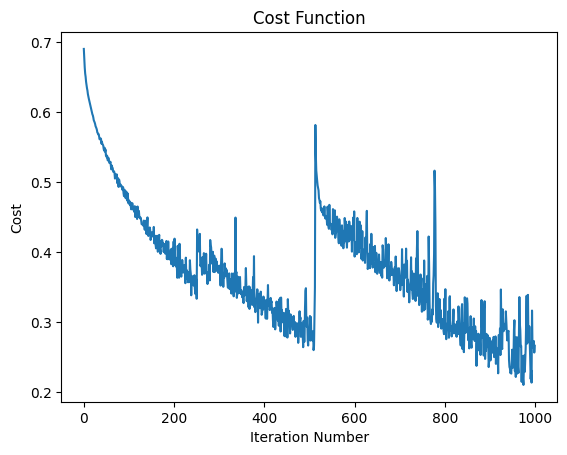

In [32]:
# Cost function
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration Number")
plt.ylabel("Cost")
plt.title("Cost Function")
plt.show()